In [248]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Reading the data from the CSV file
df = pd.read_csv('/Users/arnavmehta/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Shape before removing missing value =", df.shape)

# Removing unnecessary columns
df = df.drop(['customerID'], axis=1)

# Create an imputer object
imputer = SimpleImputer(strategy='mean')
df = df.dropna()

# Convert 'TotalCharges' to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)

# Encoding categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

df_cat = df[categorical_cols]
label_encoder = LabelEncoder()
df_cat_encoded = df_cat.apply(label_encoder.fit_transform)
df[categorical_cols] = df_cat_encoded

# Normalizing numeric columns
#numeric_cols = [col for col in df.columns if col not in categorical_cols]
#scaler = MinMaxScaler()
#df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



# Display the updated DataFrame information
print("After removing, label encoding, and normalization =")
print(df)


Shape before removing missing value = (7043, 21)
After removing, label encoding, and normalization =
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      Mult

In [235]:
#diffrent datatypes of diffrent catogies 
print(df.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


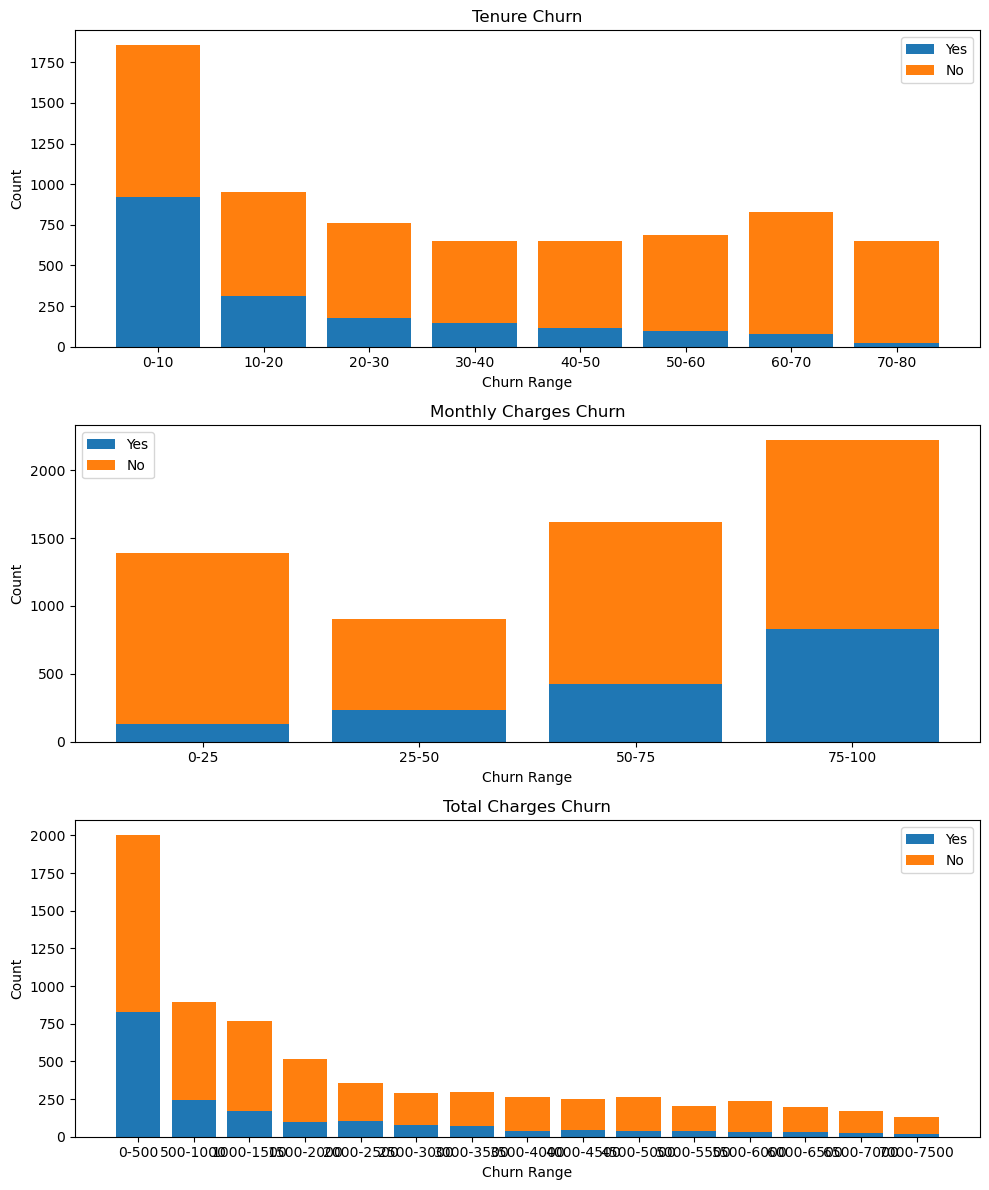

In [225]:
import matplotlib.pyplot as plt

# Extract churn and feature columns from the DataFrame
churn = df['Churn']
tenure = df['tenure']
monthly_charges = df['MonthlyCharges']
total_charges = df['TotalCharges']

# Define the churn ranges for each feature
tenure_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80]
monthly_charges_ranges = [0, 25, 50, 75, 100]
total_charges_ranges = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500]

# Calculate the churn counts for each feature range
tenure_churn_counts_yes = []
tenure_churn_counts_no = []
monthly_charges_churn_counts_yes = []
monthly_charges_churn_counts_no = []
total_charges_churn_counts_yes = []
total_charges_churn_counts_no = []

for start, end in zip(tenure_ranges[:-1], tenure_ranges[1:]):
    churn_range = ((tenure >= start) & (tenure < end))
    tenure_churn_counts_yes.append((churn_range & (churn == 1)).sum())
    tenure_churn_counts_no.append((churn_range & (churn == 0)).sum())

for start, end in zip(monthly_charges_ranges[:-1], monthly_charges_ranges[1:]):
    churn_range = ((monthly_charges >= start) & (monthly_charges < end))
    monthly_charges_churn_counts_yes.append((churn_range & (churn == 1)).sum())
    monthly_charges_churn_counts_no.append((churn_range & (churn == 0)).sum())

for start, end in zip(total_charges_ranges[:-1], total_charges_ranges[1:]):
    churn_range = ((total_charges >= start) & (total_charges < end))
    total_charges_churn_counts_yes.append((churn_range & (churn == 1)).sum())
    total_charges_churn_counts_no.append((churn_range & (churn == 0)).sum())

# Plotting the bar graphs
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Tenure Churn
x = range(len(tenure_ranges)-1)
axs[0].bar(x, tenure_churn_counts_yes, label='Yes')
axs[0].bar(x, tenure_churn_counts_no, bottom=tenure_churn_counts_yes, label='No')
axs[0].set_xlabel('Churn Range')
axs[0].set_ylabel('Count')
axs[0].set_title('Tenure Churn')
axs[0].set_xticks(x)
axs[0].set_xticklabels([f'{start}-{end}' for start, end in zip(tenure_ranges[:-1], tenure_ranges[1:])])
axs[0].legend()

# Monthly Charges Churn
x = range(len(monthly_charges_ranges)-1)
axs[1].bar(x, monthly_charges_churn_counts_yes, label='Yes')
axs[1].bar(x, monthly_charges_churn_counts_no, bottom=monthly_charges_churn_counts_yes, label='No')
axs[1].set_xlabel('Churn Range')
axs[1].set_ylabel('Count')
axs[1].set_title('Monthly Charges Churn')
axs[1].set_xticks(x)
axs[1].set_xticklabels([f'{start}-{end}' for start, end in zip(monthly_charges_ranges[:-1], monthly_charges_ranges[1:])])
axs[1].legend()

# Total Charges Churn
x = range(len(total_charges_ranges)-1)
axs[2].bar(x, total_charges_churn_counts_yes, label='Yes')
axs[2].bar(x, total_charges_churn_counts_no, bottom=total_charges_churn_counts_yes, label='No')
axs[2].set_xlabel('Churn Range')
axs[2].set_ylabel('Count')
axs[2].set_title('Total Charges Churn')
axs[2].set_xticks(x)
axs[2].set_xticklabels([f'{start}-{end}' for start, end in zip(total_charges_ranges[:-1], total_charges_ranges[1:])])
axs[2].legend()

plt.tight_layout()
plt.show()


/Users/arnavmehta/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


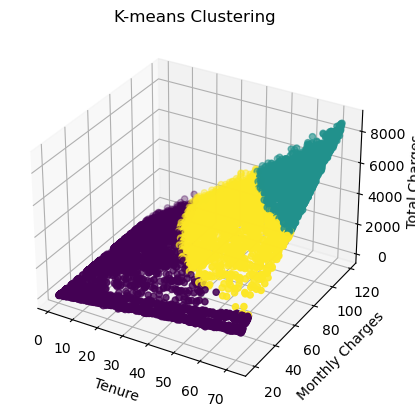

In [226]:

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Perform K-means clustering on the imputed data
kmeans = KMeans(n_clusters=3, random_state=42)

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Selecting the features for clustering
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data = df[selected_features]



# Fit K-means to the imputed data
kmeans.fit(data_imputed)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the cluster labels and corresponding feature values
cluster_labels = df['Cluster']
x = df['tenure']
y = df['MonthlyCharges']
z = df['TotalCharges']

# Scatter plot
ax.scatter(x, y, z, c=cluster_labels, cmap='viridis')

# Set labels and title
ax.set_xlabel('Tenure')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Total Charges')
ax.set_title('K-means Clustering')

plt.show()

In [249]:
# Normalizing numeric columns
numeric_cols = [col for col in df.columns if col not in categorical_cols]
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [254]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Load the dataset
dataset = df.values

# split into input (X) and output (y) variables
Xtr = dataset[:5000, :-1]
ytr = dataset[:5000, -1].reshape(-1, 1)
Xtst = dataset[5000:7000, :-1]
ytst = dataset[5000:7000, -1].reshape(-1, 1)

# Convert data to float32
Xtr = Xtr.astype(np.float32)
ytr = ytr.astype(np.float32)
Xtst = Xtst.astype(np.float32)
ytst = ytst.astype(np.float32)

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=Xtr.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(Xtr, ytr, epochs=500, batch_size=10, verbose=1)

# evaluate the keras model
print('Accuracy: %.2f' % (accuracy * 100))


Epoch 1/500
500/500 [==============================] - 1s 652us/step - loss: 0.5412 - accuracy: 0.7394
Epoch 2/500
500/500 [==============================] - 0s 697us/step - loss: 0.4465 - accuracy: 0.7732
Epoch 3/500
500/500 [==============================] - 0s 582us/step - loss: 0.4338 - accuracy: 0.7844
Epoch 4/500
500/500 [==============================] - 0s 447us/step - loss: 0.4284 - accuracy: 0.7906
Epoch 5/500
500/500 [==============================] - 0s 490us/step - loss: 0.4247 - accuracy: 0.7922
Epoch 6/500
500/500 [==============================] - 0s 487us/step - loss: 0.4211 - accuracy: 0.7950
Epoch 7/500
500/500 [==============================] - 0s 462us/step - loss: 0.4180 - accuracy: 0.7976
Epoch 8/500
500/500 [==============================] - 0s 445us/step - loss: 0.4165 - accuracy: 0.8034
Epoch 9/500
500/500 [==============================] - 0s 447us/step - loss: 0.4141 - accuracy: 0.8022
Epoch 10/500
500/500 [==============================] - 0s 444us/step - l

500/500 [==============================] - 0s 475us/step - loss: 0.3913 - accuracy: 0.8158
Epoch 80/500
500/500 [==============================] - 0s 483us/step - loss: 0.3905 - accuracy: 0.8164
Epoch 81/500
500/500 [==============================] - 0s 555us/step - loss: 0.3918 - accuracy: 0.8178
Epoch 82/500
500/500 [==============================] - 0s 832us/step - loss: 0.3919 - accuracy: 0.8142
Epoch 83/500
500/500 [==============================] - 0s 830us/step - loss: 0.3906 - accuracy: 0.8148
Epoch 84/500
500/500 [==============================] - 0s 496us/step - loss: 0.3916 - accuracy: 0.8164
Epoch 85/500
500/500 [==============================] - 0s 453us/step - loss: 0.3909 - accuracy: 0.8156
Epoch 86/500
500/500 [==============================] - 0s 513us/step - loss: 0.3908 - accuracy: 0.8204
Epoch 87/500
500/500 [==============================] - 0s 702us/step - loss: 0.3910 - accuracy: 0.8190
Epoch 88/500
500/500 [==============================] - 0s 625us/step - loss:

500/500 [==============================] - 1s 1ms/step - loss: 0.3806 - accuracy: 0.8188
Epoch 158/500
500/500 [==============================] - 1s 1ms/step - loss: 0.3810 - accuracy: 0.8210
Epoch 159/500
500/500 [==============================] - 0s 697us/step - loss: 0.3818 - accuracy: 0.8200
Epoch 160/500
500/500 [==============================] - 0s 557us/step - loss: 0.3805 - accuracy: 0.8214
Epoch 161/500
500/500 [==============================] - 0s 645us/step - loss: 0.3805 - accuracy: 0.8196
Epoch 162/500
500/500 [==============================] - 0s 696us/step - loss: 0.3804 - accuracy: 0.8206
Epoch 163/500
500/500 [==============================] - 0s 652us/step - loss: 0.3802 - accuracy: 0.8220
Epoch 164/500
500/500 [==============================] - 0s 508us/step - loss: 0.3801 - accuracy: 0.8204
Epoch 165/500
500/500 [==============================] - 0s 458us/step - loss: 0.3803 - accuracy: 0.8222
Epoch 166/500
500/500 [==============================] - 0s 435us/step - 

500/500 [==============================] - 0s 440us/step - loss: 0.3741 - accuracy: 0.8254
Epoch 236/500
500/500 [==============================] - 0s 435us/step - loss: 0.3744 - accuracy: 0.8268
Epoch 237/500
500/500 [==============================] - 0s 435us/step - loss: 0.3741 - accuracy: 0.8276
Epoch 238/500
500/500 [==============================] - 0s 434us/step - loss: 0.3743 - accuracy: 0.8290
Epoch 239/500
500/500 [==============================] - 0s 438us/step - loss: 0.3738 - accuracy: 0.8250
Epoch 240/500
500/500 [==============================] - 0s 440us/step - loss: 0.3747 - accuracy: 0.8290
Epoch 241/500
500/500 [==============================] - 0s 441us/step - loss: 0.3726 - accuracy: 0.8268
Epoch 242/500
500/500 [==============================] - 0s 438us/step - loss: 0.3738 - accuracy: 0.8274
Epoch 243/500
500/500 [==============================] - 0s 436us/step - loss: 0.3742 - accuracy: 0.8288
Epoch 244/500
500/500 [==============================] - 0s 436us/ste

500/500 [==============================] - 0s 436us/step - loss: 0.3650 - accuracy: 0.8324
Epoch 314/500
500/500 [==============================] - 0s 433us/step - loss: 0.3651 - accuracy: 0.8318
Epoch 315/500
500/500 [==============================] - 0s 433us/step - loss: 0.3656 - accuracy: 0.8304
Epoch 316/500
500/500 [==============================] - 0s 432us/step - loss: 0.3660 - accuracy: 0.8322
Epoch 317/500
500/500 [==============================] - 0s 432us/step - loss: 0.3642 - accuracy: 0.8324
Epoch 318/500
500/500 [==============================] - 0s 431us/step - loss: 0.3648 - accuracy: 0.8318
Epoch 319/500
500/500 [==============================] - 0s 431us/step - loss: 0.3636 - accuracy: 0.8292
Epoch 320/500
500/500 [==============================] - 0s 431us/step - loss: 0.3643 - accuracy: 0.8308
Epoch 321/500
500/500 [==============================] - 0s 434us/step - loss: 0.3646 - accuracy: 0.8308
Epoch 322/500
500/500 [==============================] - 0s 434us/ste

500/500 [==============================] - 0s 437us/step - loss: 0.3605 - accuracy: 0.8304
Epoch 392/500
500/500 [==============================] - 0s 460us/step - loss: 0.3613 - accuracy: 0.8320
Epoch 393/500
500/500 [==============================] - 0s 436us/step - loss: 0.3603 - accuracy: 0.8316
Epoch 394/500
500/500 [==============================] - 0s 436us/step - loss: 0.3601 - accuracy: 0.8324
Epoch 395/500
500/500 [==============================] - 0s 436us/step - loss: 0.3598 - accuracy: 0.8314
Epoch 396/500
500/500 [==============================] - 0s 435us/step - loss: 0.3602 - accuracy: 0.8318
Epoch 397/500
500/500 [==============================] - 0s 447us/step - loss: 0.3600 - accuracy: 0.8332
Epoch 398/500
500/500 [==============================] - 0s 436us/step - loss: 0.3590 - accuracy: 0.8318
Epoch 399/500
500/500 [==============================] - 0s 432us/step - loss: 0.3606 - accuracy: 0.8304
Epoch 400/500
500/500 [==============================] - 0s 443us/ste

500/500 [==============================] - 0s 656us/step - loss: 0.3574 - accuracy: 0.8330
Epoch 470/500
500/500 [==============================] - 1s 1ms/step - loss: 0.3562 - accuracy: 0.8334
Epoch 471/500
500/500 [==============================] - 1s 1ms/step - loss: 0.3572 - accuracy: 0.8330
Epoch 472/500
500/500 [==============================] - 1s 1ms/step - loss: 0.3564 - accuracy: 0.8328
Epoch 473/500
500/500 [==============================] - 0s 895us/step - loss: 0.3571 - accuracy: 0.8310
Epoch 474/500
500/500 [==============================] - 1s 1ms/step - loss: 0.3554 - accuracy: 0.8338
Epoch 475/500
500/500 [==============================] - 0s 862us/step - loss: 0.3577 - accuracy: 0.8314
Epoch 476/500
500/500 [==============================] - 0s 717us/step - loss: 0.3554 - accuracy: 0.8330
Epoch 477/500
500/500 [==============================] - 0s 495us/step - loss: 0.3560 - accuracy: 0.8306
Epoch 478/500
500/500 [==============================] - 0s 469us/step - loss

Accuracy: 0.7395315826827538


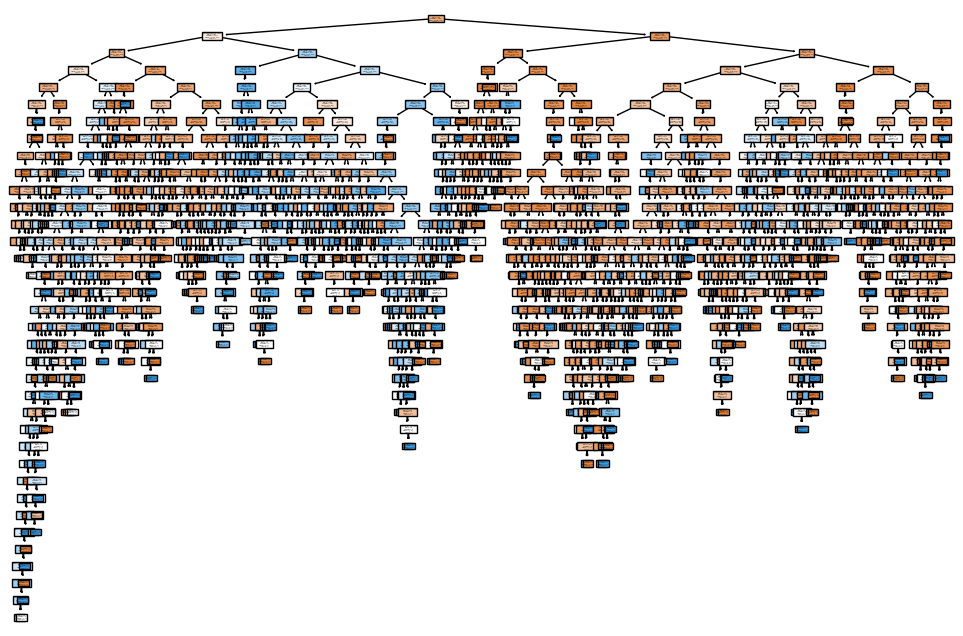

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

## Separate features and target variable
features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
target = df['Churn']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features.columns, class_names=[str(c) for c in clf.classes_], filled=True)
plt.show()


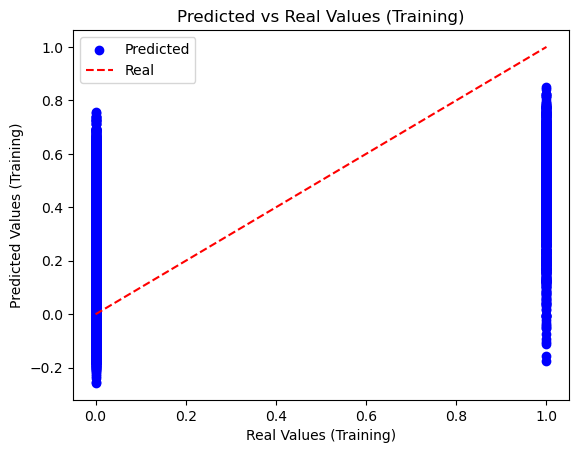

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Drop rows with missing values
df = df.dropna()

# Separate the independent and dependent variables
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Visualize predicted vs real values for training data
plt.scatter(y_train, y_train_pred, c='blue', label='Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Real')
plt.xlabel('Real Values (Training)')
plt.ylabel('Predicted Values (Training)')
plt.title('Predicted vs Real Values (Training)')
plt.legend()
plt.show()


Predicted Churn values:
[1 0 0 ... 0 1 0]
Accuracy:80.36%


/Users/arnavmehta/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


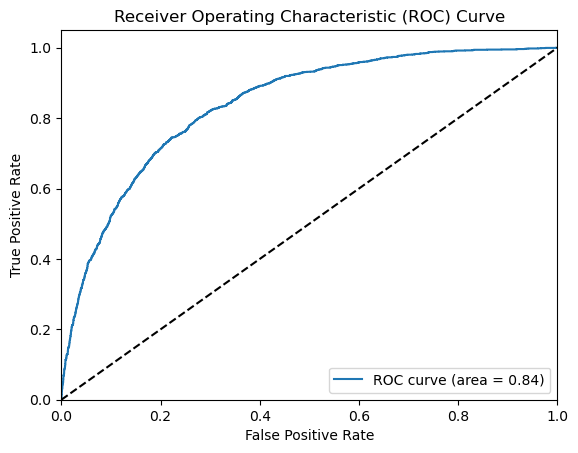

In [252]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df = df.dropna()

# Separate the independent and dependent variables
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the scaled data
model.fit(X_scaled, y)

# Predict the target variable
y_pred = model.predict(X_scaled)

# Print the predicted values
print("Predicted Churn values:")
print(y_pred)

Acc = accuracy_score(y, y_pred)
print("Accuracy:{:.2f}%".format(Acc*100))

#####
# Calculate the probabilities for class 1
y_prob = model.predict_proba(X)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc_score = roc_auc_score(y, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#####

